# Analysis and Model Building 

In [ ]:
# import libraries and load csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import joblib
%matplotlib inline

## Load the cleaned data

In [3]:
# Load the cleaned dataset from the directory
data_cleaned = pd.read_csv('../data/processed/data_cleaned.csv')

# Verify the data is loaded successfully
print(data_cleaned.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.66         0.00             1.8      0.075   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 13.0                  40.0   0.9978  3.51       0.56   

   alcohol  quality color  
0      9.4        5   red  
1      9.8        5   red  
2 

## Checking if a certain type of wine (red or white) associated with higher quality (Answering question 1)

In [4]:
# Group by 'color' and calculate summary statistics for 'quality'
quality_by_color = data_cleaned.groupby('color')['quality'].agg(['mean', 'median', 'count'])

print(quality_by_color)

           mean  median  count
color                         
red    5.623252     6.0   1359
white  5.854835     6.0   3961


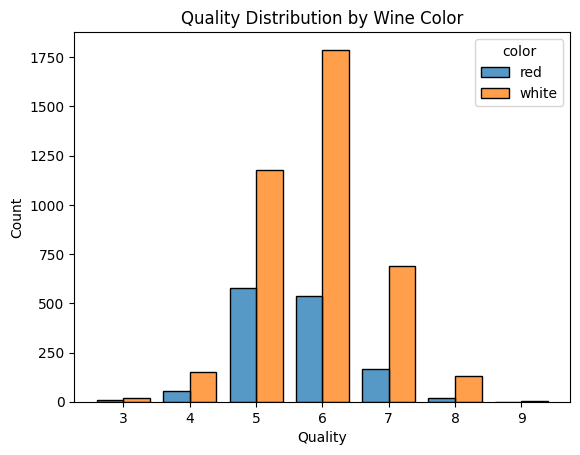

In [50]:
# Create a side-by-side histogram with spacing between bars
sns.histplot(data=data_cleaned, x='quality', hue='color', multiple='dodge', discrete=True, shrink=0.8)
plt.title('Quality Distribution by Wine Color')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

### Hypothesis test 

In [51]:
# Split the data into red and white wines
red_wine_quality = data_cleaned[data_cleaned['color'] == 'red']['quality']
white_wine_quality = data_cleaned[data_cleaned['color'] == 'white']['quality']

# Perform a t-test
t_stat, p_value = ttest_ind(red_wine_quality, white_wine_quality)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -8.42814214552532, P-value: 4.472190708795861e-17


### Interpretation (Answer to question 1)

#### Yes, a certain type of whine (White) is associated with higher quality rating given its average rating of 5.854835 against the average rating of 5.623252 for red whine. I can also confirm the rating is not due to chance as it has a p-value score of 4.472190708795861e-17 which is below 0.05. So the result is statistically significant

In [52]:
# Calculate the correlation between alcohol and quality
correlation = data_cleaned['alcohol'].corr(data_cleaned['quality'])
print(f"Correlation between alcohol and quality: {correlation:.2f}")

Correlation between alcohol and quality: 0.47


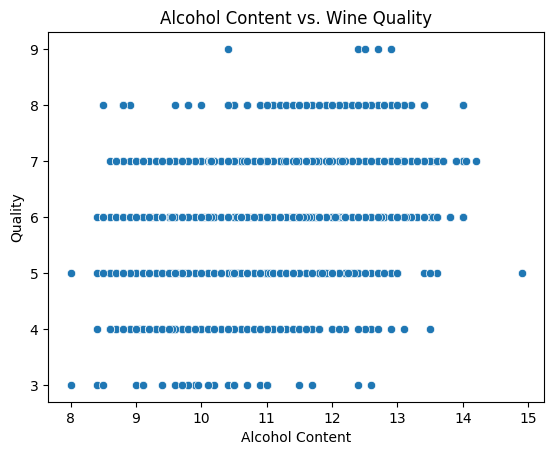

In [10]:
# Create a scatter plot of alcohol vs. quality
sns.scatterplot(x='alcohol', y='quality', data=data_cleaned)
plt.title('Alcohol Content vs. Wine Quality')
plt.xlabel('Alcohol Content')
plt.ylabel('Quality')
plt.show()

In [11]:
# Group by quality and calculate mean alcohol content
alcohol_by_quality = data_cleaned.groupby('quality')['alcohol'].mean()

print(alcohol_by_quality)

quality
3    10.215000
4    10.215049
5     9.872211
6    10.649060
7    11.511020
8    11.912162
9    12.180000
Name: alcohol, dtype: float64


In [15]:
# Add a constant to the alcohol column (required for statsmodels)
X = sm.add_constant(data_cleaned['alcohol'])
y = data_cleaned['quality']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.220
Method:                 Least Squares   F-statistic:                     1503.
Date:                Sat, 01 Feb 2025   Prob (F-statistic):          8.28e-290
Time:                        10:01:58   Log-Likelihood:                -6204.7
No. Observations:                5320   AIC:                         1.241e+04
Df Residuals:                    5318   BIC:                         1.243e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.1221      0.095     22.255      0.0

In [16]:
# Calculate the correlation between residual_sugar and quality
correlation = data_cleaned['residual_sugar'].corr(data_cleaned['quality'])
print(f"Correlation between residual_sugar and quality: {correlation:.2f}")

Correlation between residual_sugar and quality: -0.06


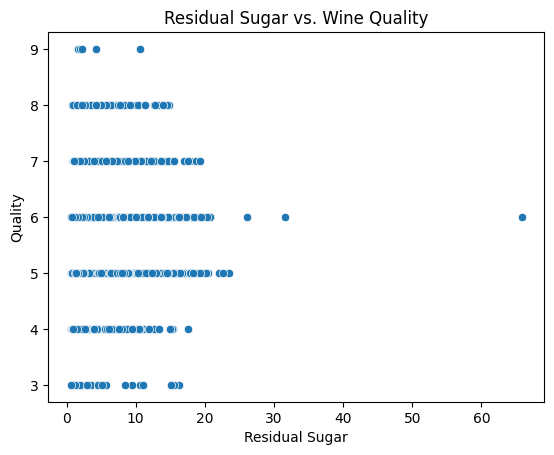

In [17]:
# Create a scatter plot of residual_sugar vs. quality
sns.scatterplot(x='residual_sugar', y='quality', data=data_cleaned)
plt.title('Residual Sugar vs. Wine Quality')
plt.xlabel('Residual Sugar')
plt.ylabel('Quality')
plt.show()

In [18]:
# Group by quality and calculate mean residual_sugar
sugar_by_quality = data_cleaned.groupby('quality')['residual_sugar'].mean()

print(sugar_by_quality)

quality
3    5.140000
4    4.034951
5    5.481906
6    5.153142
7    4.171320
8    4.771622
9    4.120000
Name: residual_sugar, dtype: float64


In [19]:
# Add a constant to the residual_sugar column (required for statsmodels)
X = sm.add_constant(data_cleaned['residual_sugar'])
y = data_cleaned['quality']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     17.23
Date:                Sat, 01 Feb 2025   Prob (F-statistic):           3.36e-05
Time:                        10:08:41   Log-Likelihood:                -6858.2
No. Observations:                5320   AIC:                         1.372e+04
Df Residuals:                    5318   BIC:                         1.373e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              5.8518      0.018    323.

In [21]:
# Calculate correlations between acidity features and quality
acidity_features = ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'pH']
correlations = data_cleaned[acidity_features + ['quality']].corr()['quality'].drop('quality')

print(correlations)

fixed_acidity      -0.080092
volatile_acidity   -0.265205
citric_acid         0.097954
pH                  0.039733
Name: quality, dtype: float64


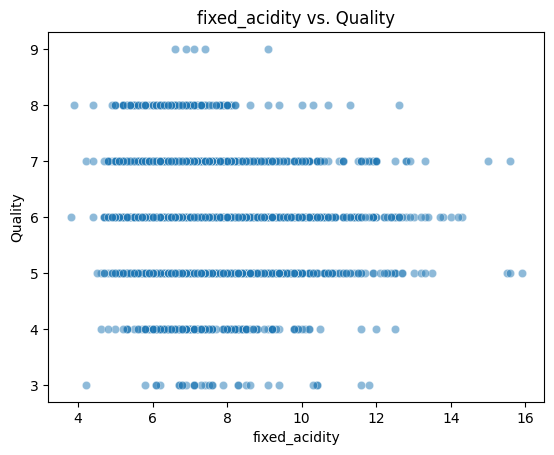

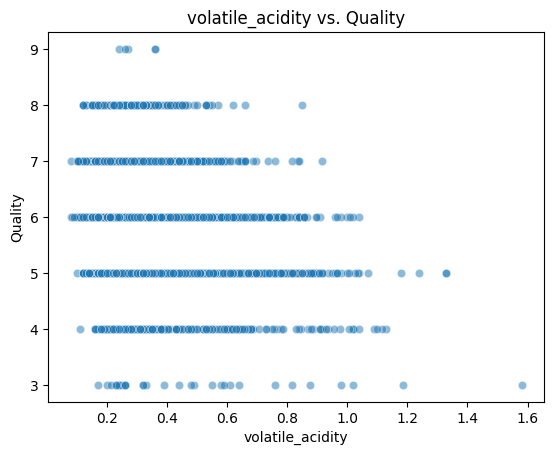

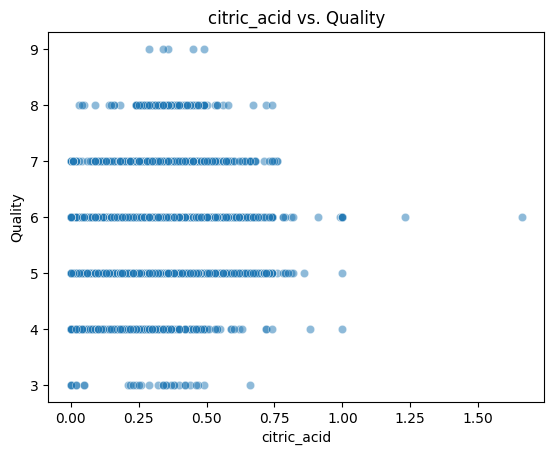

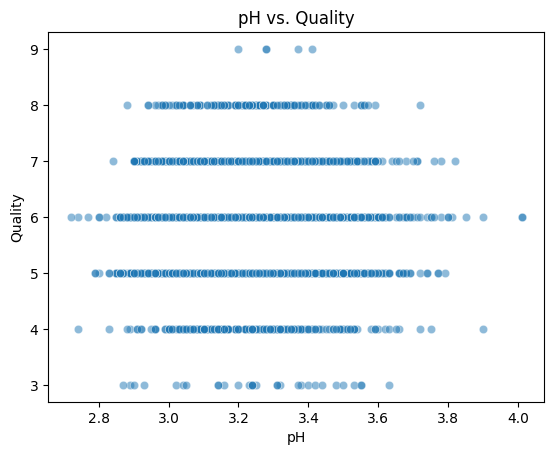

In [22]:
# Create scatter plots for each acidity feature
for feature in acidity_features:
    sns.scatterplot(x=feature, y='quality', data=data_cleaned, alpha=0.5)
    plt.title(f'{feature} vs. Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')
    plt.show()

In [23]:
# Group by quality and calculate mean acidity levels
acidity_by_quality = data_cleaned.groupby('quality')[acidity_features].mean()

print(acidity_by_quality)

         fixed_acidity  volatile_acidity  citric_acid        pH
quality                                                        
3             7.853333          0.517000     0.281000  3.257667
4             7.304369          0.462379     0.271505  3.235874
5             7.333248          0.393970     0.305845  3.214275
6             7.169027          0.315626     0.324671  3.224120
7             7.122021          0.292342     0.336040  3.240479
8             6.820270          0.302973     0.340541  3.239595
9             7.420000          0.298000     0.386000  3.308000


In [24]:
# Features (independent variables)
X = data_cleaned.drop(columns=['quality'])

# Target (dependent variable)
y = data_cleaned['quality']

In [25]:
# One-hot encode the 'color' column
X = pd.get_dummies(X, columns=['color'], drop_first=True)

In [26]:
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [29]:
# Predict on the test set
y_pred = model.predict(X_test)

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

MAE: 0.51
MSE: 0.44
R²: 0.41


In [36]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


In [37]:
# Get feature importances
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print(importance_df)

                 Feature  Importance
10               alcohol    0.264733
1       volatile_acidity    0.115699
5    free_sulfur_dioxide    0.094190
9              sulphates    0.082888
6   total_sulfur_dioxide    0.073699
8                     pH    0.070620
3         residual_sugar    0.064271
4              chlorides    0.060978
0          fixed_acidity    0.058411
2            citric_acid    0.056828
7                density    0.056343
11           color_white    0.001341


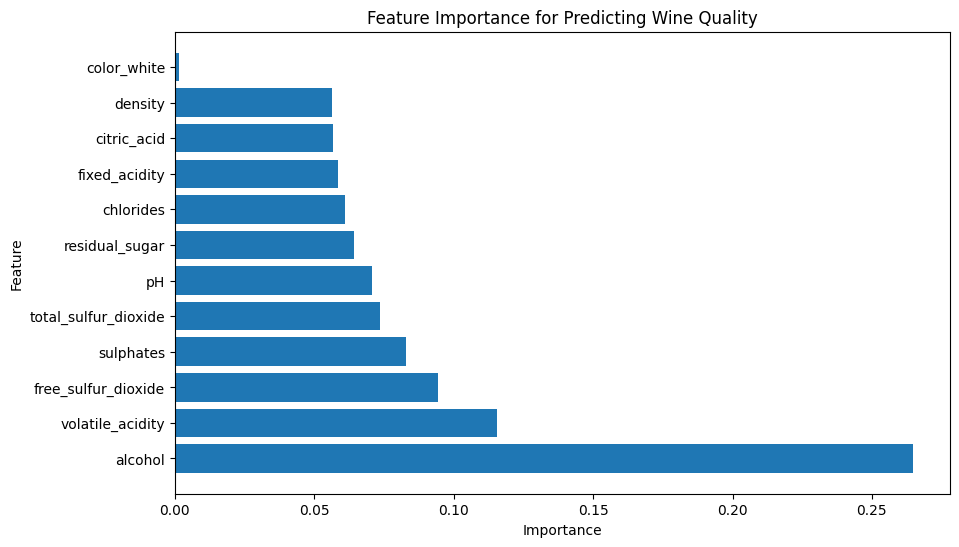

In [38]:
# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Predicting Wine Quality')
plt.show()

In [40]:
# Save the model
joblib.dump(best_model, 'wine_quality_predictor.pkl')

# Load the model (later)
loaded_model = joblib.load('wine_quality_predictor.pkl')